# MSCA 31010 HW 1
## Sijie Li
### 1/24/2022

### Read Data File

In [287]:
import pandas as pd
import numpy as np

dataset = pd.read_excel (r"C:\Users\Sijie Li\OneDrive - The University of Chicago\Documents\MSCA\Winter2021\MSCA31010 Linear\Wk3\HW\WeightDiary.xlsx")
df = pd.DataFrame(dataset)
df

,Date,Weight
0,2017-03-04,2.0970000e+02
1,2017-03-04,2.1240000e+02
2,2017-03-05,2.1000000e+02
3,2017-03-05,2.1430000e+02
4,2017-03-06,2.0910000e+02
...,...,...
1039,2019-12-27,2.1780000e+02
1040,2019-12-28,2.1560000e+02
1041,2019-12-29,2.1450000e+02
1042,2019-12-30,2.1470000e+02


### Insert Month Name and Day of Week Columns

In [291]:
import datetime

dates = pd.to_datetime(df['Date'])

month = pd.DatetimeIndex(dates).month

df['Month'] = month

df['DayofWeek'] = dates.dt.dayofweek

df

,Date,Weight,Month,DayofWeek
0,2017-03-04,2.0970000e+02,3,5
1,2017-03-04,2.1240000e+02,3,5
2,2017-03-05,2.1000000e+02,3,6
3,2017-03-05,2.1430000e+02,3,6
4,2017-03-06,2.0910000e+02,3,0
...,...,...,...,...
1039,2019-12-27,2.1780000e+02,12,4
1040,2019-12-28,2.1560000e+02,12,5
1041,2019-12-29,2.1450000e+02,12,6
1042,2019-12-30,2.1470000e+02,12,0


### QUESTION 1

### a. Frequency table for Month and Days of Week


In [293]:
Freq_Month = pd.crosstab(index= df['Month'], columns='count')
Freq_Month.sort_values(by=['count'], ascending=False)

col_0,count
Month,
3,115
4,112
5,105
6,98
12,90
10,86
9,85
11,83
7,82


In [294]:
Freq_DoW = pd.crosstab(index=df['DayofWeek'], columns='count')
Freq_DoW.sort_values(by=['count'], ascending=False)

col_0,count
DayofWeek,
3,154
1,153
2,151
0,148
6,147
5,146
4,145


In [295]:
import numpy
import pandas

from scipy.stats import f

import sys

sys.path.append(r'C:\Users\Sijie Li\OneDrive - The University of Chicago\Documents\MSCA\Winter2021\MSCA31010 Linear')

import Regression

# Set some options for printing all the columns
numpy.set_printoptions(precision = 7, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)
pandas.set_option('precision', 10)
pandas.options.display.float_format = '{:,.7e}'.format

In [296]:
X = pd.get_dummies(pd.DataFrame(['Month', 'DayofWeek']))
X.insert(0, 'Intercept', 1)
param_name = X.columns
y = df['Weight']
b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X, y)
beta = pandas.Series(b, index = param_name)


In [297]:
print('Parameter Estimates')
print(beta)
print('Residual Sum of Squares = ', residual_SS)
print('Generalized Inverse of XtX')
print(XtX_Ginv)
print('Aliased Parameter', param_name[aliasParam])
print('Non-Aliased Parameter', param_name[nonAliasParam])
predicted_y = numpy.matmul(X, b)
print('Predicted Values')
print(predicted_y)

Parameter Estimates
Intercept     2.0970000e+02
0_DayofWeek   2.7000000e+00
0_Month       0.0000000e+00
dtype: float64
Residual Sum of Squares =  -1.0446754572512873e-11
Generalized Inverse of XtX
[[ 1. -1.  0.]
 [-1.  2.  0.]
 [ 0.  0.  0.]]
Aliased Parameter Index(['0_Month'], dtype='object')
Non-Aliased Parameter Index(['Intercept', '0_DayofWeek'], dtype='object')
Predicted Values
0   2.0970000e+02
1   2.1240000e+02
dtype: float64


In [299]:
beta.Intercept

209.70000000000002

### b. What is the Residual Sum of Squares for this model Weight ~ Intercept?  Give your answer using the “.7E” scientific notation

In [261]:
var_in_model = ['Intercept']
y = df['Weight']

stepSummary = pandas.DataFrame()

b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X[var_in_model],y) 
                                  
m0 = len(nonAliasParam)

stepSummary = stepSummary.append([[0, var_in_model, residual_SS, m0]], ignore_index = True)

stepSummary.columns = [' ','Var','RSS','m0']

stepSummary

,,Var,RSS,m0
0,0,[Intercept],2.2360230e+04,1


### c. What is the Residual Sum of Squares for this model Weight ~ Intercept + Month?   Give your answer using the “.7E” scientific notation.

In [260]:
var_in_model = ['Intercept','Month']
y = df['Weight']

stepSummary = pandas.DataFrame()

b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X[var_in_model],y) 
                                  
m0 = len(nonAliasParam)

stepSummary = stepSummary.append([[0, var_in_model, residual_SS, m0]], ignore_index = True)

stepSummary.columns = [' ','Var','RSS','m0']

stepSummary

,,Var,RSS,m0
0,0,"[Intercept, Month]",2.1378469e+04,2


### d. What is the Residual Sum of Squares for this model Weight ~ Intercept + DayOfWeek?    Give your answer using the “.7E” scientific notation.

In [259]:
var_in_model = ['Intercept','DayofWeek']
y = df['Weight']

stepSummary = pandas.DataFrame()

b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X[var_in_model],y) 
                                  
m0 = len(nonAliasParam)

stepSummary = stepSummary.append([[0, var_in_model, residual_SS, m0]], ignore_index = True)

stepSummary.columns = [' ','Var','RSS','m0']

stepSummary

,,Var,RSS,m0
0,0,"[Intercept, DayofWeek]",2.2357645e+04,2


### e. What is the generalized inverse that the SWEEP Operator gives for this model Weight ~ Intercept + DayOfWeek?    Give your answer using the “.7E” scientific notation.

In [258]:
b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X, y)
beta = pandas.Series(b, index = param_name)

print('Generalized Inverse of XtX')
print(XtX_Ginv)

Generalized Inverse of XtX
[[ 6.8463662e-03 -5.7138166e-04 -7.1917898e-04]
 [-5.7138166e-04  8.7066003e-05  1.5072345e-07]
 [-7.1917898e-04  1.5072345e-07  2.4116790e-04]]


### f. What is the Residual Sum of Squares for this model Weight ~ Intercept + Month + DayOfWeek?    Give your answer using the “.7E” scientific notation.

In [257]:
var_in_model = ['Intercept','Month','DayofWeek']
y = df['Weight']

stepSummary = pandas.DataFrame()

b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X[var_in_model],y) 
                                  
m0 = len(nonAliasParam)

stepSummary = stepSummary.append([[0, var_in_model, residual_SS, m0]], ignore_index = True)

stepSummary.columns = [' ','Var','RSS','m0']

stepSummary

,,Var,RSS,m0
0,0,"[Intercept, Month, DayofWeek]",2.1375988e+04,3


### g. Which model yields the smallest Residual Sum of Squares?

#### model Weight ~ Intercept + Month + DayOfWeek

### h. How many regression parameters (including the aliased parameters) are in this model Weight ~ Intercept + Month + DayOfWeek?

In [256]:
n0 = len(nonAliasParam) + len(aliasParam)
n0

3

### i. What are the regression coefficients (including the aliased parameters) of this model Weight ~ Intercept + Month + DayOfWeek?    Give your answer using the “.7E” scientific notation.

In [255]:
var_in_model = ['Intercept','Month','DayofWeek']
y = df['Weight']

stepSummary = pandas.DataFrame()

b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X[var_in_model],y) 
                                  
m0 = len(nonAliasParam)

stepSummary = stepSummary.append([[0, var_in_model, b, m0]], ignore_index = True)

stepSummary.columns = [' ','Var','Beta','m0']

stepSummary

,,Var,Beta,m0
0,0,"[Intercept, Month, DayofWeek]","[205.22434257009206, 0.29235073410940177, -0.024460202280184064]",3


## Quetion 2

### a. Generate a Boxplot of the residuals versus Month.  The residuals are on the vertical axis and the Month categories are on the horizontal axis.  Also, generate another Boxplot of the residuals versus DayOfWeek.  Comment on the evidence of heteroskedasticity of the residuals.

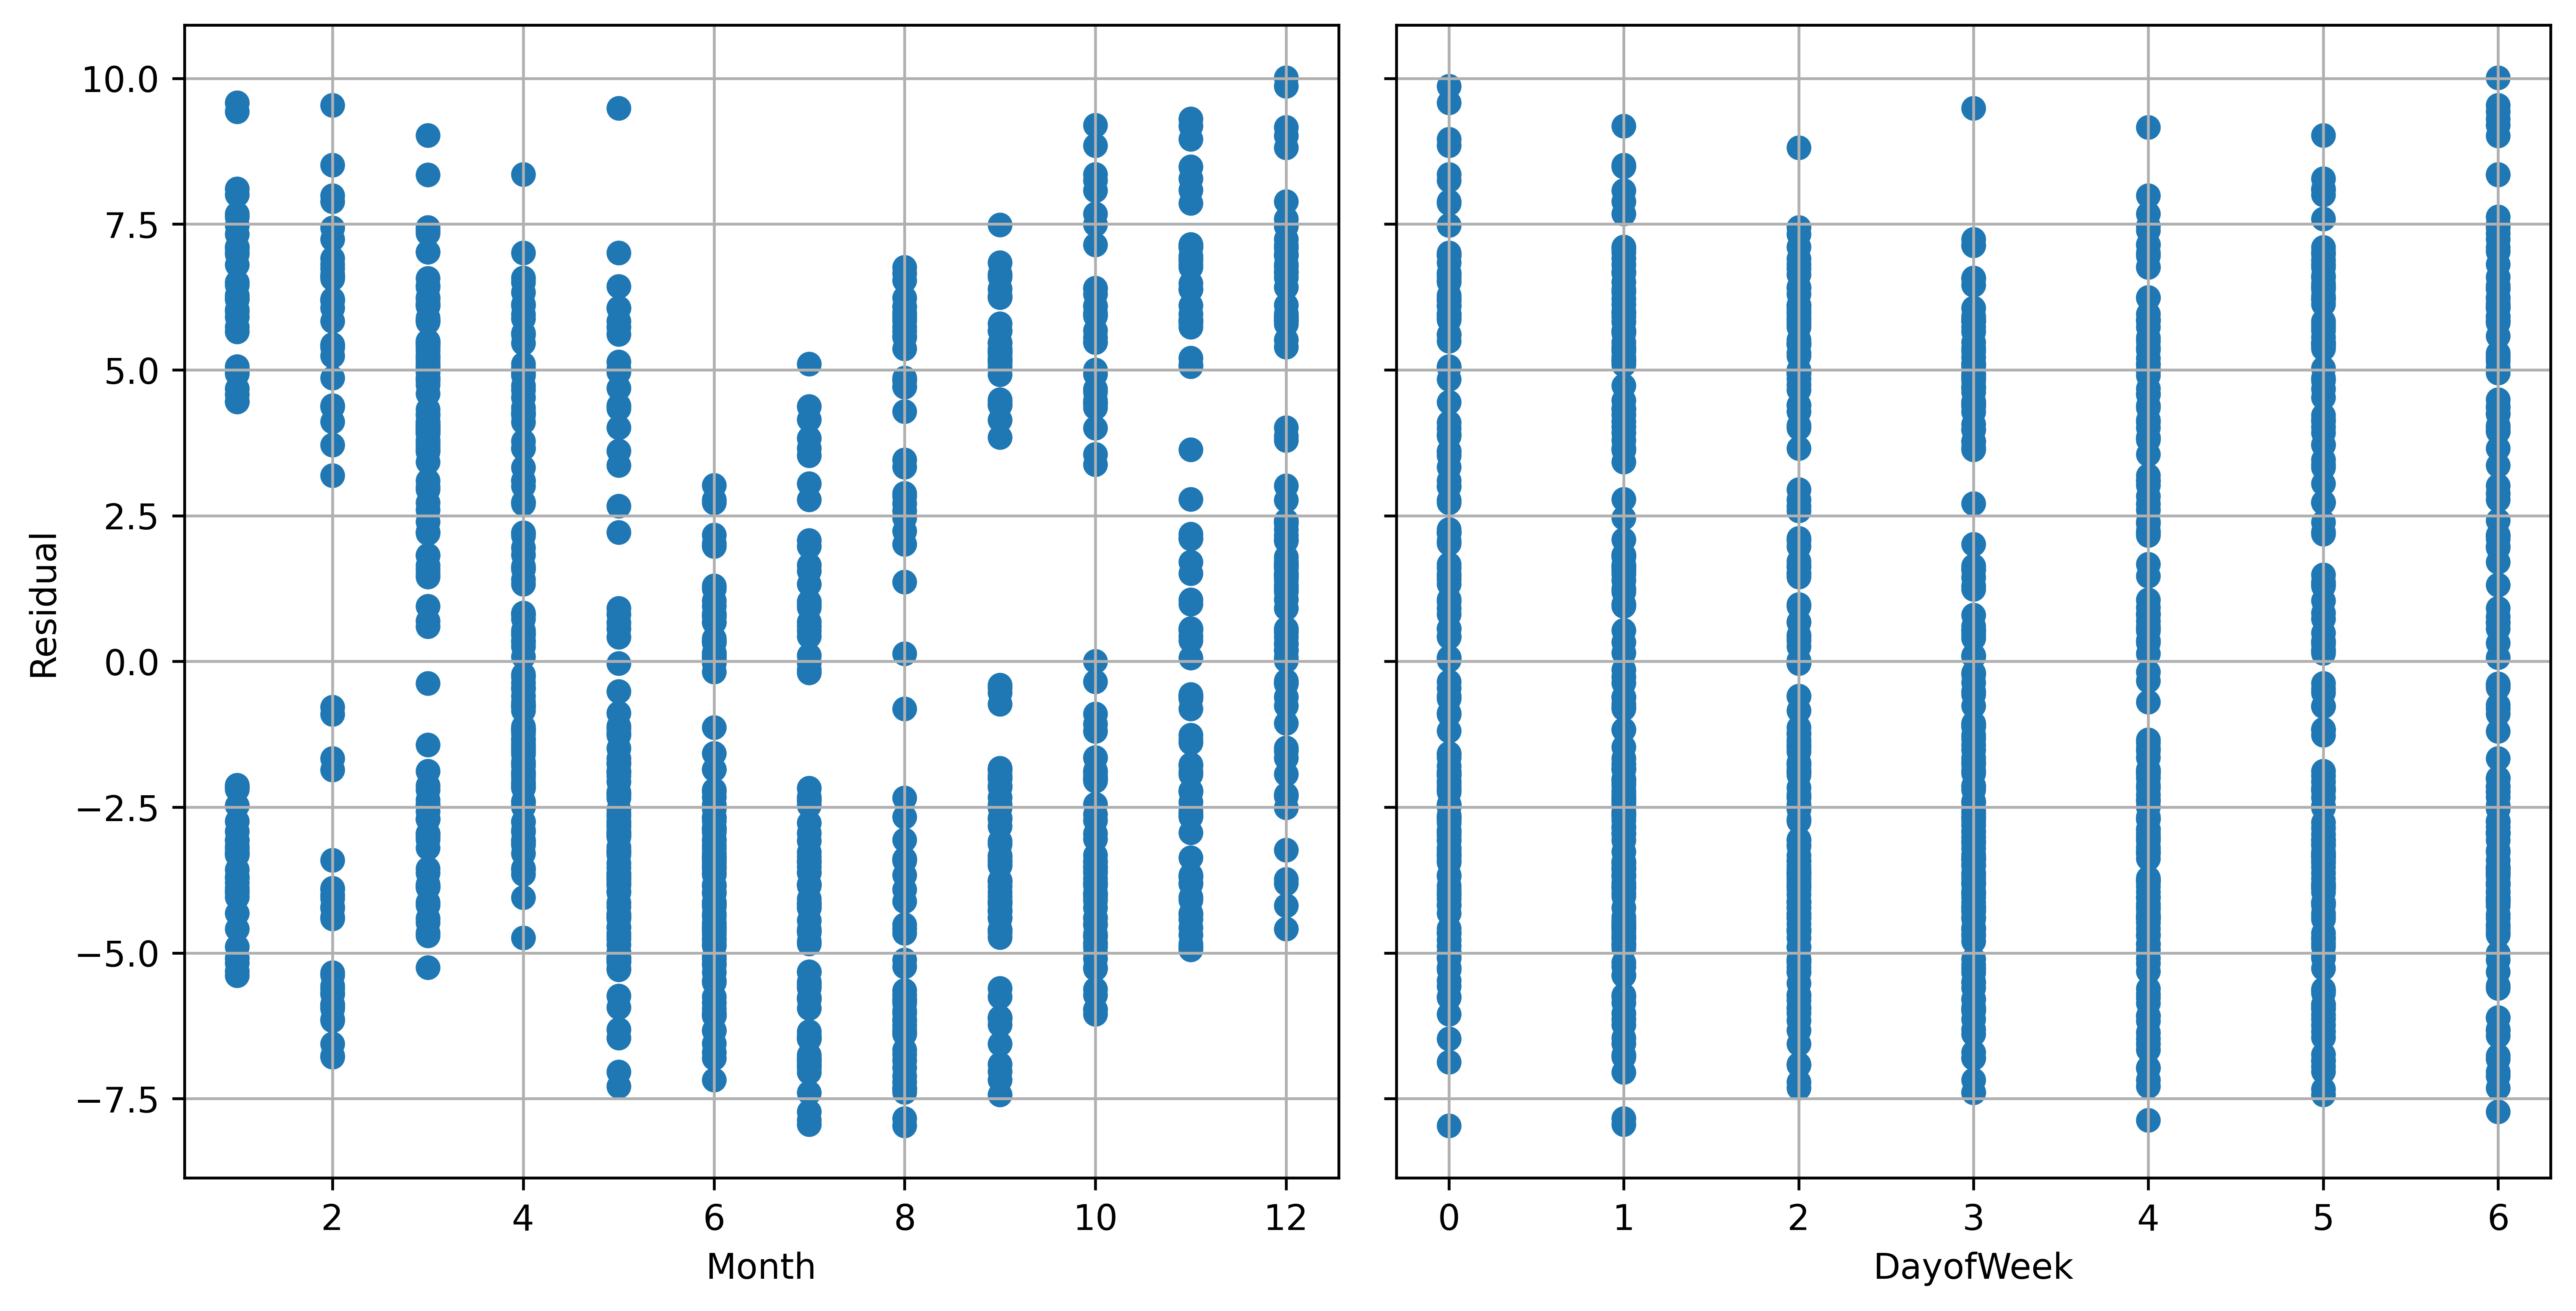

In [254]:
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

# Set some options for printing all the columns
numpy.set_printoptions(precision = 7, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)
pandas.set_option('precision', 10)
pandas.options.display.float_format = '{:,.7e}'.format

X = df[['Month', 'DayofWeek']]
X.insert(0, 'Intercept', 1)
param_name = X.columns
y = df['Weight']

b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X, y)
beta = pandas.Series(b, index = param_name)

# Model: Weight ~ 1 + Month + DayofWeek
b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X, y)
pred_y = numpy.matmul(X, b)
resid_y = y - pred_y


# Examine the residuals
fig, (ax00, ax01) = plt.subplots(1, 2, dpi = 600, sharey = True, figsize = (12,6))
plt.subplots_adjust(wspace = 0.05)
ax00.scatter(X['Month'], resid_y)
ax00.set_xlabel('Month')
ax00.set_ylabel('Residual')
ax00.grid(axis = 'both')
ax01.scatter(X['DayofWeek'], resid_y)
ax01.set_xlabel('DayofWeek')
ax01.set_ylabel('')
ax01.grid(axis = 'both')
plt.show()

#### To check for heteroscedasticity, you need to assess the residuals by fitted value plots specifically. 
#### Typically, the telltale pattern for heteroscedasticity is that as the fitted values increases, 
#### the variance of the residuals also increases. If there is an unequal scatter of residuals, the population used in the regression contains unequal variance, and therefore the analysis results may be heteroscedastic. Month 's residuals appear to be heterosedastic. 

### b. Calculate the Anderson-Darling Test statistic and generate a Normality Q-Q Plot for the residuals.  Comment on the evidence of normality (or non-normality) of the residuals.

In [266]:
from scipy.stats import anderson

anderson_test = anderson(resid_y, dist = 'norm')
print('  Anderson Test = ', anderson_test[0])
print('Critical Values = ', anderson_test[1])
print('       p-values = ', anderson_test[2]/100.0)


  Anderson Test =  23.895782867636626
Critical Values =  [0.574 0.654 0.784 0.915 1.088]
       p-values =  [0.15  0.1   0.05  0.025 0.01 ]


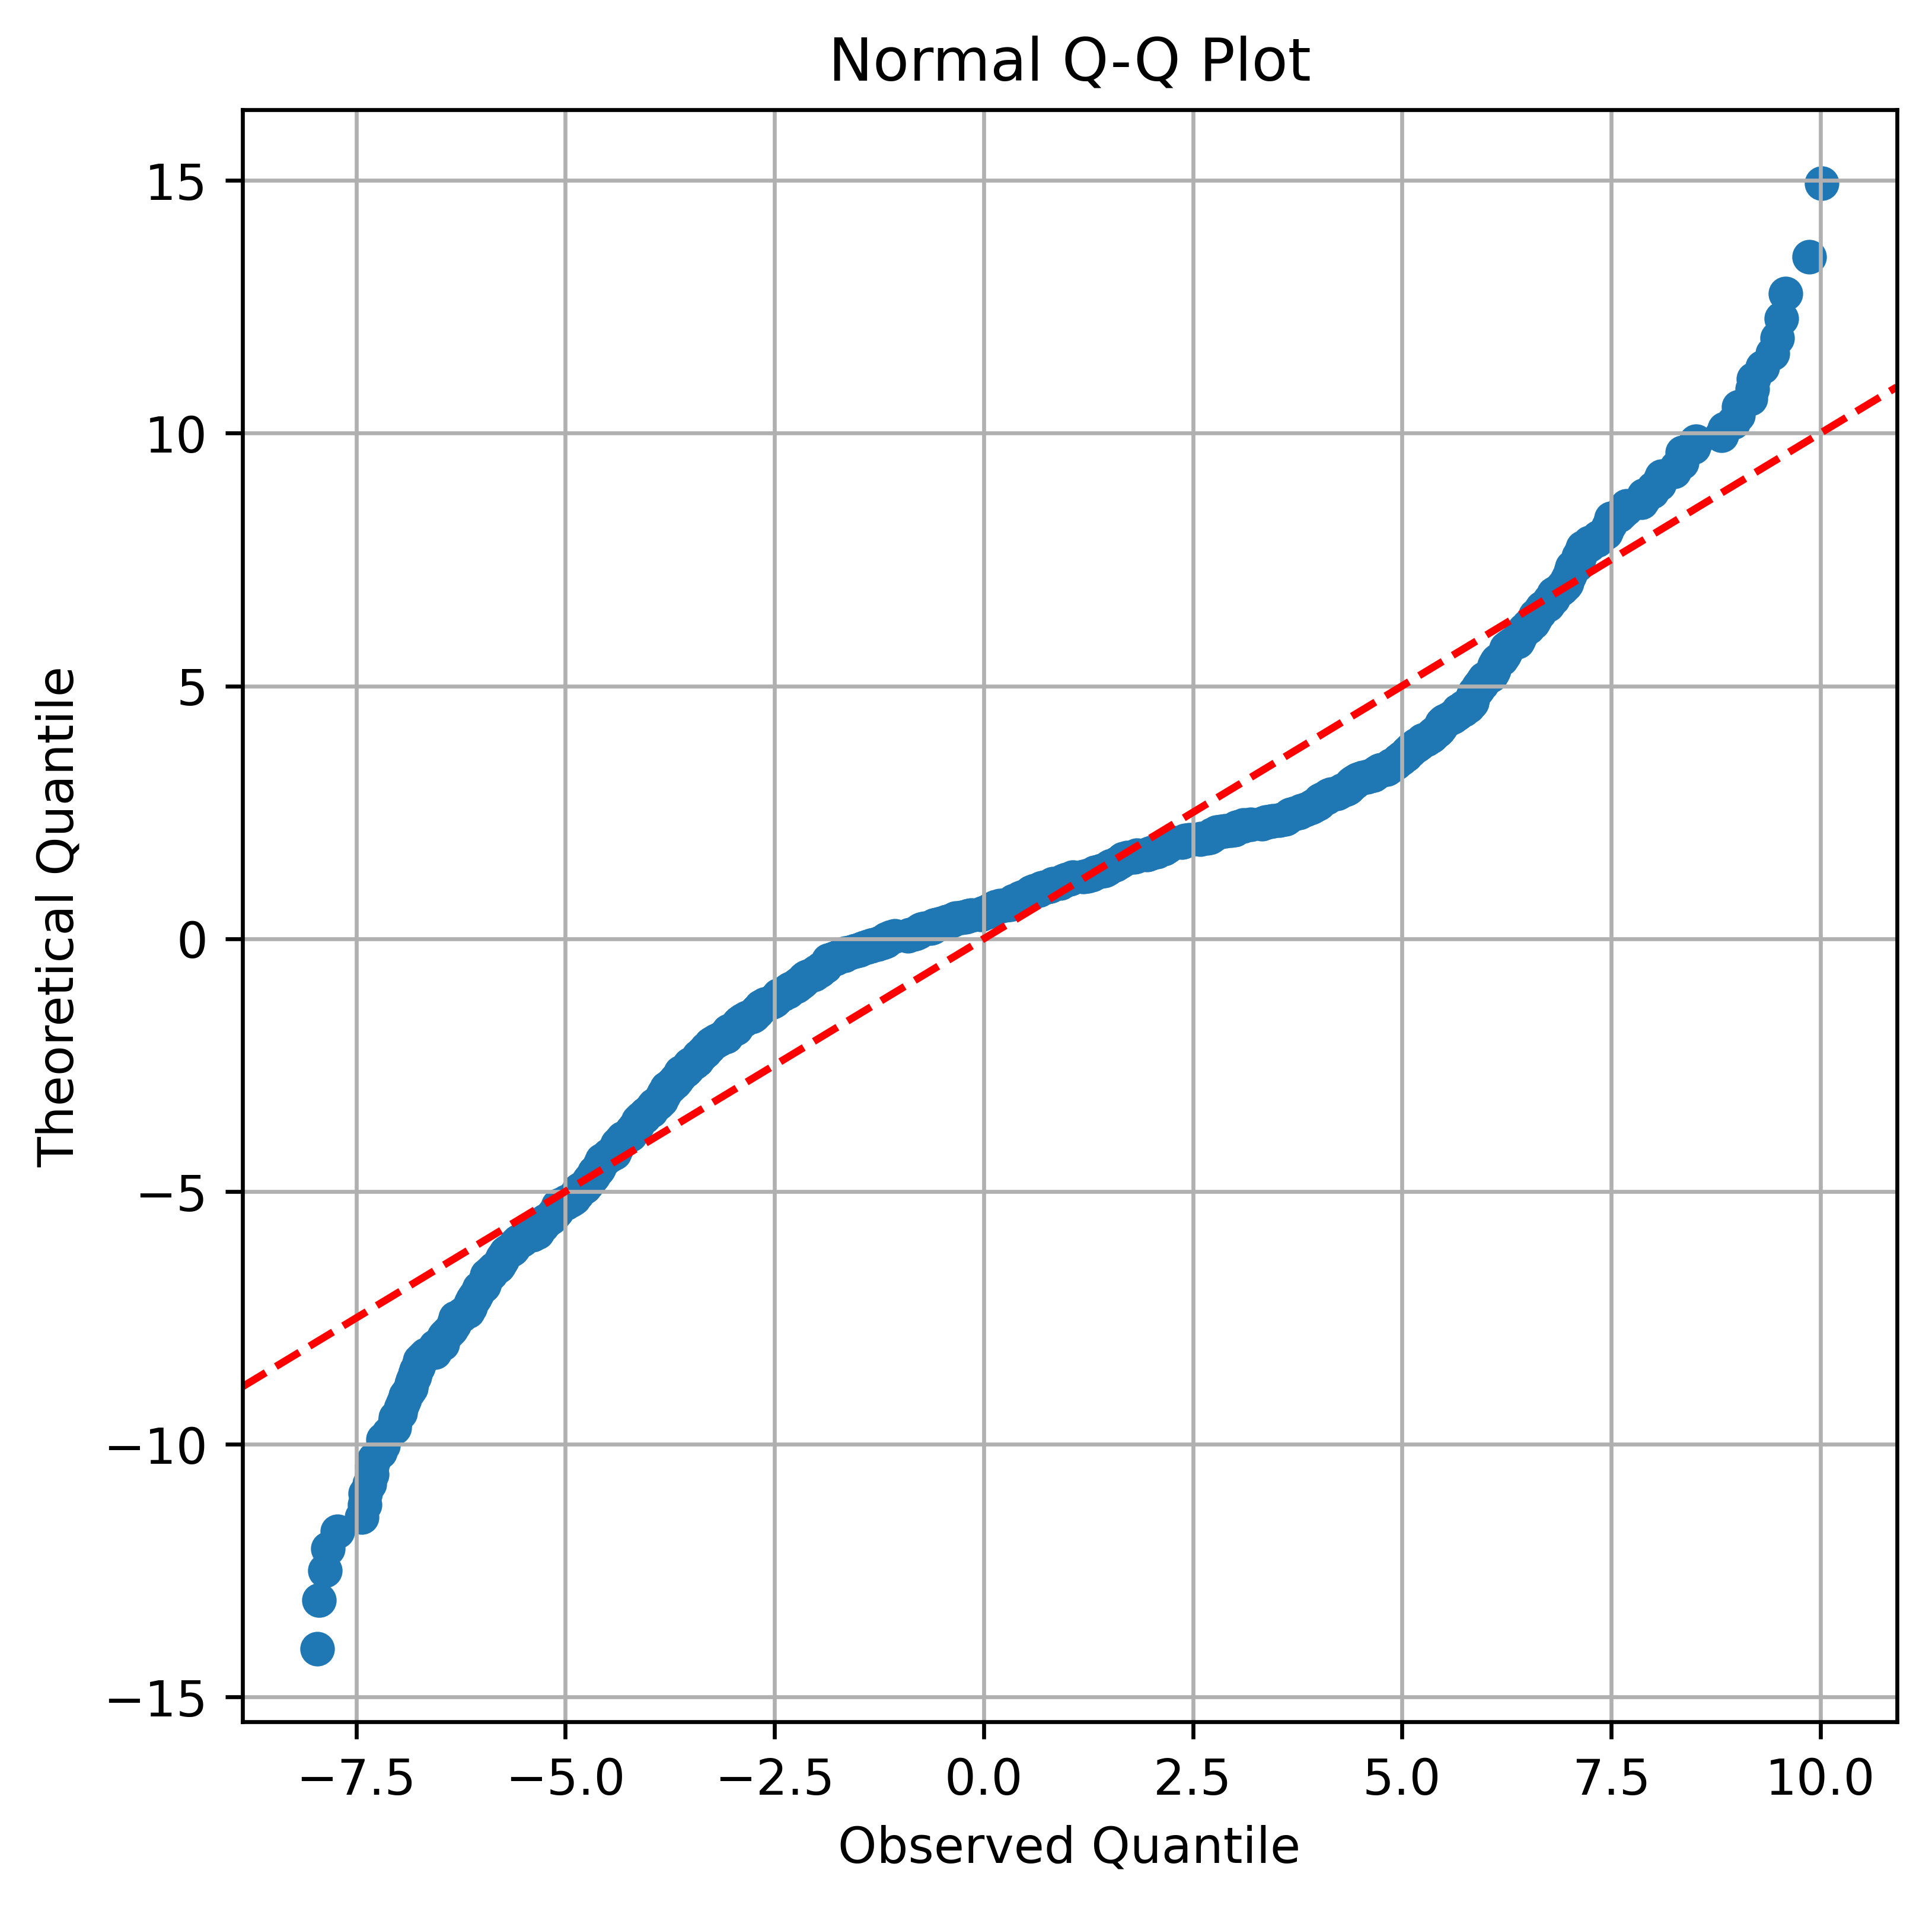

In [267]:
from statsmodels.graphics.gofplots import qqplot

obs_quantile = numpy.sort(resid_y)
z_p = numpy.array(range(n_obs))
z_p = (1.0 + z_p) / (n_obs + 0.5)
z_quantile = norm.ppf(z_p, loc = numpy.mean(obs_quantile), scale = 
numpy.std(obs_quantile))
fig, ax00 = plt.subplots(1, 1, dpi = 600, figsize = (6,6))
ax00.scatter(obs_quantile, z_quantile)
ax00.set_title('Normal Q-Q Plot')
ax00.set_xlabel('Observed Quantile')
ax00.set_ylabel('Theoretical Quantile')
ax00.axline((0,0), slope = 1, color = 'red', linestyle = '--')
ax00.grid(axis = 'both')
plt.show()

#### If the data is normally distributed, the points in the QQ-normal plot lie on a straight diagonal line. However, the above QQ plot fails to show normality.

### c. Perform the Breusch-Pagan Test and the White Test of Heteroskedasticity.  Provide the Chi-square statistics, the degrees of freedom, and the significance values.  Comment on the evidence of non-homogenous variance.

In [247]:
# Breusch-Pagan Test of Homoskedasticity
y_new = pandas.Series(resid_y * resid_y, name = 'Square_Residual')
n_obs = len(y_new)
b, SSE0, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X[['Intercept']], y_new)
b, SSE1, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X, y_new)
r_squared = 1.0 - (SSE1 / SSE0)
breusch_test = n_obs * r_squared
breusch_df = len(nonAliasParam) - 1
breusch_pvalue = chi2.sf(breusch_test, breusch_df)

names = ['Chi-sqaure Stat',
        'df', 'p-value'] 
values = (breusch_test, breusch_df, breusch_pvalue)
df2 = pd.DataFrame([names, values])
df2

,0,1,2
0,Chi-sqaure Stat,df,p-value
1,3.9969749e+00,2,1.3554014e-01


In [249]:
# White Test of Homoskedasticity
X_new = X
u = pandas.DataFrame(X['Month']*X['Month'])
u.columns =['Square_Month']
X_new = X_new.join(u)
u = pandas.DataFrame(X['DayofWeek']*X['DayofWeek'])
u.columns =['Square_DayofWeek']
X_new = X_new.join(u)
u = pandas.DataFrame(X['Month']*X['DayofWeek'])
u.columns =['Month_DayofWeek']
X_new = X_new.join(u)
b, SSE0, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X_new[['Intercept']], y_new)
b, SSE1, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X_new, y_new)
r_squared = 1.0 - (SSE1 / SSE0)
white_test = n_obs * r_squared
white_df = len(nonAliasParam) - 1
white_pvalue = chi2.sf(white_test, white_df)

names = ['Chi-sqaure Stat',
        'df', 'p-value'] 
values = (white_test, white_df, white_pvalue)
df3 = pd.DataFrame([names, values])
df3

,0,1,2
0,Chi-sqaure Stat,df,p-value
1,2.6191503e+01,5,8.1919088e-05


### d. Calculate the Durbin-Watson Test statistic.  Comment on the evidence of autocorrelation among observations.

In [251]:
# Durbin-Watson Test of Autocorrelation

z1 = resid_y[0:(n_obs-1)].to_numpy()
z2 = resid_y[1:n_obs].to_numpy()
z12_corr = numpy.corrcoef(z1, z2)
print('Autocorrelation = ', z12_corr[0,1])
durbin_watson_test = numpy.sum((z1-z2)**2) / numpy.sum(resid_y**2)
print('Durbin-Watson Test', durbin_watson_test)

Autocorrelation =  0.934612564477524
Durbin-Watson Test 0.13068845455547903


#### The DW statistic ranges from zero to four, with a value of 2.0 indicating zero autocorrelation. Values below 2.0 mean there is positive autocorrelation and above 2.0 indicates negative autocorrelation.

### e. Calculate the Shapley values of the two predictors Month and DayOfWeek.  Also, provide the Percent Shapley values of the two predictors.  Among these two predictors, which one influence the weight more?

In [282]:
!pip install pandas numpy scipy openpyxl scikit-learn statsmodels plotly shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [284]:
from sklearn.ensemble import RandomForestRegressor
import shap

model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X, y)

y_pred = model.predict(X)

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])


### the base value of median weight is 207.1, the 'Month' predicted to influence 'Weight' more.

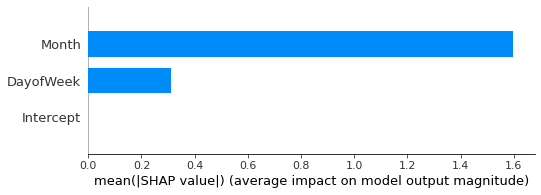

In [285]:
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

In [286]:
shap_values

array([[ 0.       ,  1.5168644,  0.0864473],
       [ 0.       ,  1.5168644,  0.0864473],
       [ 0.       ,  1.604953 ,  0.5200745],
       [ 0.       ,  1.604953 ,  0.5200745],
       [ 0.       ,  1.1648872,  0.4289113],
       [ 0.       ,  1.1648872,  0.4289113],
       [ 0.       ,  1.2166901, -0.098768 ],
       [ 0.       ,  1.2166901, -0.098768 ],
       [ 0.       ,  1.3499957, -0.297907 ],
       [ 0.       ,  1.3499957, -0.297907 ],
       [ 0.       ,  1.1927837, -0.4428541],
       [ 0.       ,  1.1927837, -0.4428541],
       [ 0.       ,  1.261032 , -0.2910431],
       [ 0.       ,  1.261032 , -0.2910431],
       [ 0.       ,  1.5168644,  0.0864473],
       [ 0.       ,  1.5168644,  0.0864473],
       [ 0.       ,  1.604953 ,  0.5200745],
       [ 0.       ,  1.604953 ,  0.5200745],
       [ 0.       ,  1.1648872,  0.4289113],
       [ 0.       ,  1.1648872,  0.4289113],
       [ 0.       ,  1.2166901, -0.098768 ],
       [ 0.       ,  1.2166901, -0.098768 ],
       [ 0